<a href="https://colab.research.google.com/github/fatimafsalazard-sketch/ModeloClasificacion/blob/main/Epidemologia/Epidemologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudio de efectos del COVID en pacientes

### Red neuronal con modelo de clasificacion sobre datos de 5 hospitales para la evolucion de sintomas basado en edad e IMC. Con el objetivo de prever una atencion oportuna a aquellos que presentan un mayor riesgo.

### 1.- Importar librerias

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d

from numpy.random import seed
from numpy.random import shuffle

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Modelo de clasificacion/Epidemologia')

### 2.- Preprocesamiento de datos

In [16]:
#Cargar datos de hospitales
data1 = np.load("datos/hospital_1.npy")
print("-----------Hospital 1-----------")
print("Tamaño de los datos: " + str(data1.shape))

#Imprimir informacion
print("Muestra(i) Edad IMC Evolución")
print("-----------------------")
for i in range(data1.shape[1]):
    print(str(i) + " " + str(data1[0, i]) + " " + str(data1[1, i]) + " " + str(data1[2, i]))

-----------Hospital 1-----------
Tamaño de los datos: (3, 200)
Muestra(i) Edad IMC Evolución
-----------------------
0 17.0 31.0 0.0
1 25.0 24.0 0.0
2 25.0 34.0 1.0
3 17.0 23.0 0.0
4 23.0 26.0 0.0
5 28.0 28.0 0.0
6 30.0 39.0 1.0
7 24.0 33.0 0.0
8 21.0 36.0 1.0
9 20.0 35.0 1.0
10 26.0 30.0 0.0
11 21.0 25.0 0.0
12 19.0 32.0 0.0
13 27.0 22.0 0.0
14 27.0 21.0 0.0
15 33.0 30.0 0.0
16 22.0 31.0 0.0
17 20.0 34.0 0.0
18 16.0 28.0 0.0
19 18.0 34.0 0.0
20 24.0 35.0 1.0
21 34.0 32.0 1.0
22 34.0 25.0 0.0
23 27.0 27.0 0.0
24 27.0 36.0 1.0
25 27.0 35.0 1.0
26 20.0 34.0 0.0
27 34.0 23.0 0.0
28 30.0 34.0 1.0
29 26.0 21.0 0.0
30 12.0 31.0 0.0
31 38.0 23.0 0.0
32 25.0 35.0 1.0
33 27.0 29.0 0.0
34 20.0 24.0 0.0
35 26.0 31.0 0.0
36 24.0 26.0 0.0
37 30.0 32.0 1.0
38 27.0 31.0 0.0
39 33.0 26.0 0.0
40 18.0 36.0 1.0
41 27.0 28.0 0.0
42 17.0 30.0 0.0
43 32.0 26.0 0.0
44 27.0 21.0 0.0
45 27.0 27.0 0.0
46 34.0 35.0 1.0
47 18.0 37.0 1.0
48 18.0 28.0 0.0
49 13.0 23.0 0.0
50 22.0 35.0 1.0
51 12.0 27.0 0.0
52 26.0 2

In [17]:
#Cargar datos de hospitales
data2 = np.load("datos/hospital_2.npy")
print("-----------Hospital 2-----------")
print("Tamaño de los datos: " + str(data2.shape))

#Imprimir informacion
print("Muestra(i) Edad IMC Evolución")
print("-----------------------")
for i in range(data2.shape[1]):
    print(str(i) + " " + str(data2[0, i]) + " " + str(data2[1, i]) + " " + str(data2[2, i]))

-----------Hospital 2-----------
Tamaño de los datos: (3, 200)
Muestra(i) Edad IMC Evolución
-----------------------
0 15.0 57.0 2.0
1 36.0 51.0 2.0
2 29.0 37.0 1.0
3 34.0 38.0 1.0
4 17.0 45.0 1.0
5 18.0 51.0 2.0
6 21.0 52.0 2.0
7 23.0 43.0 1.0
8 36.0 40.0 1.0
9 34.0 47.0 2.0
10 29.0 35.0 1.0
11 25.0 47.0 2.0
12 29.0 35.0 1.0
13 16.0 33.0 0.0
14 32.0 49.0 2.0
15 33.0 33.0 1.0
16 14.0 46.0 1.0
17 29.0 39.0 1.0
18 25.0 40.0 1.0
19 13.0 49.0 1.0
20 22.0 37.0 1.0
21 21.0 45.0 1.0
22 18.0 52.0 2.0
23 16.0 54.0 2.0
24 23.0 58.0 2.0
25 24.0 50.0 2.0
26 35.0 33.0 1.0
27 21.0 43.0 1.0
28 34.0 47.0 2.0
29 19.0 48.0 1.0
30 15.0 38.0 1.0
31 25.0 43.0 1.0
32 30.0 49.0 2.0
33 31.0 38.0 1.0
34 33.0 46.0 2.0
35 22.0 43.0 1.0
36 29.0 49.0 2.0
37 24.0 45.0 1.0
38 23.0 53.0 2.0
39 19.0 46.0 1.0
40 27.0 51.0 2.0
41 30.0 46.0 2.0
42 16.0 50.0 2.0
43 18.0 42.0 1.0
44 23.0 55.0 2.0
45 24.0 45.0 1.0
46 23.0 33.0 0.0
47 27.0 38.0 1.0
48 15.0 46.0 1.0
49 30.0 36.0 1.0
50 31.0 55.0 2.0
51 31.0 48.0 2.0
52 23.0 5

In [18]:
#Cargar datos de hospitales
data3 = np.load("datos/hospital_3.npy")
print("-----------Hospital 3-----------")
print("Tamaño de los datos: " + str(data3.shape))

#Imprimir informacion
print("Muestra(i) Edad IMC Evolución")
print("-----------------------")
for i in range(data3.shape[1]):
    print(str(i) + " " + str(data3[0, i]) + " " + str(data3[1, i]) + " " + str(data3[2, i]))

-----------Hospital 3-----------
Tamaño de los datos: (3, 200)
Muestra(i) Edad IMC Evolución
-----------------------
0 49.0 33.0 1.0
1 53.0 50.0 2.0
2 44.0 44.0 2.0
3 53.0 39.0 2.0
4 52.0 28.0 1.0
5 51.0 36.0 1.0
6 37.0 32.0 1.0
7 39.0 36.0 1.0
8 58.0 44.0 2.0
9 42.0 47.0 2.0
10 48.0 52.0 2.0
11 50.0 27.0 1.0
12 50.0 44.0 2.0
13 45.0 36.0 1.0
14 51.0 26.0 0.0
15 53.0 37.0 2.0
16 49.0 41.0 2.0
17 52.0 49.0 2.0
18 58.0 39.0 2.0
19 43.0 26.0 0.0
20 45.0 44.0 2.0
21 44.0 45.0 2.0
22 52.0 38.0 2.0
23 55.0 26.0 0.0
24 50.0 51.0 2.0
25 50.0 36.0 1.0
26 50.0 33.0 1.0
27 39.0 45.0 2.0
28 50.0 51.0 2.0
29 47.0 30.0 1.0
30 43.0 59.0 2.0
31 50.0 32.0 1.0
32 57.0 27.0 1.0
33 38.0 48.0 2.0
34 39.0 23.0 0.0
35 50.0 55.0 2.0
36 48.0 38.0 1.0
37 56.0 38.0 2.0
38 50.0 29.0 1.0
39 41.0 49.0 2.0
40 46.0 36.0 1.0
41 46.0 27.0 0.0
42 55.0 52.0 2.0
43 44.0 50.0 2.0
44 41.0 42.0 2.0
45 39.0 51.0 2.0
46 40.0 40.0 1.0
47 46.0 46.0 2.0
48 57.0 52.0 2.0
49 43.0 47.0 2.0
50 55.0 34.0 1.0
51 54.0 50.0 2.0
52 50.0 3

In [19]:
#Cargar datos de hospitales
data4 = np.load("datos/hospital_4.npy")
print("-----------Hospital 4-----------")
print("Tamaño de los datos: " + str(data4.shape))

#Imprimir informacion
print("Muestra(i) Edad IMC Evolución")
print("-----------------------")
for i in range(data4.shape[1]):
    print(str(i) + " " + str(data4[0, i]) + " " + str(data4[1, i]) + " " + str(data4[2, i]))

-----------Hospital 4-----------
Tamaño de los datos: (3, 200)
Muestra(i) Edad IMC Evolución
-----------------------
0 60.0 23.0 0.0
1 57.0 26.0 1.0
2 37.0 24.0 0.0
3 53.0 22.0 0.0
4 56.0 27.0 1.0
5 39.0 28.0 0.0
6 43.0 27.0 0.0
7 44.0 28.0 0.0
8 37.0 26.0 0.0
9 40.0 26.0 0.0
10 58.0 25.0 0.0
11 46.0 22.0 0.0
12 41.0 25.0 0.0
13 46.0 26.0 0.0
14 55.0 22.0 0.0
15 48.0 25.0 0.0
16 59.0 23.0 0.0
17 45.0 24.0 0.0
18 49.0 24.0 0.0
19 58.0 25.0 0.0
20 38.0 21.0 0.0
21 51.0 23.0 0.0
22 60.0 23.0 0.0
23 43.0 28.0 0.0
24 42.0 23.0 0.0
25 50.0 22.0 0.0
26 52.0 22.0 0.0
27 46.0 26.0 0.0
28 48.0 25.0 0.0
29 43.0 27.0 0.0
30 40.0 25.0 0.0
31 39.0 23.0 0.0
32 46.0 23.0 0.0
33 61.0 24.0 0.0
34 51.0 20.0 0.0
35 57.0 20.0 0.0
36 38.0 28.0 0.0
37 40.0 21.0 0.0
38 51.0 26.0 0.0
39 49.0 25.0 0.0
40 42.0 25.0 0.0
41 49.0 26.0 0.0
42 46.0 23.0 0.0
43 51.0 23.0 0.0
44 53.0 24.0 0.0
45 52.0 25.0 0.0
46 51.0 21.0 0.0
47 56.0 28.0 1.0
48 57.0 29.0 1.0
49 47.0 27.0 0.0
50 45.0 29.0 1.0
51 45.0 20.0 0.0
52 60.0 2

In [20]:
#Cargar datos de hospitales
data5 = np.load("datos/hospital_5.npy")
print("-----------Hospital 5-----------")
print("Tamaño de los datos: " + str(data5.shape))

#Imprimir informacion
print("Muestra(i) Edad IMC Evolución")
print("-----------------------")
for i in range(data5.shape[1]):
    print(str(i) + " " + str(data5[0, i]) + " " + str(data5[1, i]) + " " + str(data5[2, i]))

-----------Hospital 5-----------
Tamaño de los datos: (3, 200)
Muestra(i) Edad IMC Evolución
-----------------------
0 74.0 38.0 2.0
1 64.0 34.0 1.0
2 60.0 42.0 2.0
3 68.0 47.0 2.0
4 67.0 49.0 2.0
5 69.0 31.0 1.0
6 79.0 35.0 2.0
7 74.0 29.0 1.0
8 63.0 31.0 1.0
9 70.0 33.0 2.0
10 65.0 40.0 2.0
11 62.0 28.0 1.0
12 69.0 30.0 1.0
13 63.0 31.0 1.0
14 72.0 29.0 1.0
15 65.0 31.0 1.0
16 81.0 37.0 2.0
17 59.0 43.0 2.0
18 67.0 38.0 2.0
19 77.0 39.0 2.0
20 65.0 35.0 2.0
21 76.0 23.0 0.0
22 70.0 32.0 1.0
23 61.0 28.0 1.0
24 67.0 32.0 1.0
25 64.0 26.0 1.0
26 71.0 32.0 1.0
27 64.0 41.0 2.0
28 71.0 30.0 1.0
29 66.0 32.0 1.0
30 66.0 29.0 1.0
31 75.0 39.0 2.0
32 70.0 46.0 2.0
33 68.0 43.0 2.0
34 69.0 28.0 1.0
35 74.0 27.0 1.0
36 67.0 34.0 2.0
37 66.0 40.0 2.0
38 64.0 29.0 1.0
39 66.0 21.0 0.0
40 61.0 38.0 2.0
41 74.0 40.0 2.0
42 70.0 27.0 1.0
43 57.0 28.0 1.0
44 68.0 24.0 0.0
45 80.0 32.0 2.0
46 63.0 29.0 1.0
47 60.0 29.0 1.0
48 72.0 42.0 2.0
49 72.0 32.0 1.0
50 71.0 31.0 1.0
51 75.0 38.0 2.0
52 70.0 3

In [21]:
#Procesamiento
import random

#Cargar datos
data_t = np.concatenate((data1, data2, data3, data4, data5), axis=1)

#Extraer informacion
x= data_t[0:2,:]#clase
y= data_t[2,:]#clase


#Ordenar informacion
x = np.transpose(x)
y = y.astype("uint8")

#Desordenar datos
index = np.linspace(0, x.shape[0] - 1, x.shape[0]).astype("int")
random.shuffle(index)
x = x[index, :]
y = y[index]

#Normalizar datos
promedio = np.mean(x, axis=0)
desviacion = np.std(x, axis=0)
x = (x - promedio) / desviacion



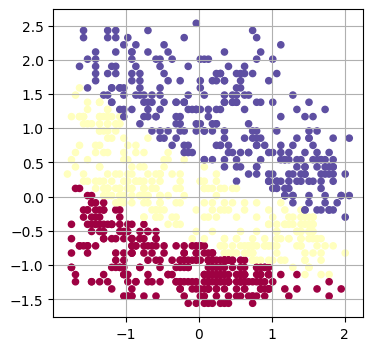

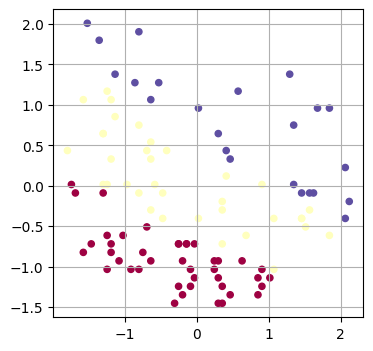

In [22]:
#Separar datos en entrenamiento y validacion
train_p = 0.9
val_p = 0.1

#Separar datos
x_train = x[0:int(train_p*x.shape[0]), :]
y_train = y[0:int(train_p*x.shape[0])]
x_val = x[int(train_p*x.shape[0]):, :]
y_val = y[int(train_p*x.shape[0]):]

#Graficar informacion
plt.figure(figsize=(4,4))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=20, cmap=plt.cm.Spectral)
plt.grid()
plt.show()

plt.figure(figsize=(4,4))
plt.scatter(x_val[:, 0], x_val[:, 1], c=y_val, s=20, cmap=plt.cm.Spectral)
plt.grid()
plt.show()

### 3.- Definicion del modelo

In [23]:
#Funciones auxiliares

#Sigmoide
def sigmoid(x):

  y = 1.0/(1.0 + np.exp(-x))

  return y

#Softmax
def softmax(x):

  y = np.exp(x)/np.sum(np.exp(x))

  return y

#Cross entropy
def cross_entropy(ym, d):

  e = -np.log(ym[d])

  return e

In [24]:
from tqdm import tqdm

#Crear clase de modelo de clasificacion
class NN:

    #Definir constructor
    def __init__(self, d, ne, no, ns):

        '''
        Entradas:
          d: Dimensiones de la entrada
          ne: Neuronas de la capa de entrada
          no: Neuronas de la capa oculta
          ns: Neuronas de la capa de salida
        '''

        #Guardar parametros
        self.d = d
        self.ne = ne
        self.no = no
        self.ns = ns

        #Inicializar parametros de la red
        self.w1 = np.random.rand(ne, d) - 0.5
        self.b1 = np.random.rand(ne, 1)  - 0.5
        self.w2 = np.random.rand(no, ne) - 0.5
        self.b2 = np.random.rand(no, 1)  - 0.5
        self.w3 = np.random.rand(ns, no) - 0.5
        self.b3 = np.random.rand(ns, 1)  - 0.5

    #Procesamiento del modelo
    def forward(self, x):

        #Capa de entrada
        h1 = np.dot(self.w1, x) + self.b1
        y1 = sigmoid(h1)

        #Capa oculta
        h2 = np.dot(self.w2, y1) + self.b2
        y2 = sigmoid(h2)

        #Capa de salida
        h3 = np.dot(self.w3, y2) + self.b3
        ym  = softmax(h3)

        return ym

    #Entrenamiento del modelo
    def train(self, x, y, x_val, y_val, Lr, epoch):

        '''
        Cada epoca el modelo entrenara con los datos de entrenamiento (x, y)
        y posteriormente calculara el error y rendimiento en los datos de validacion (x_val, y_val).
        '''

        #Inicializar error de entrenamiento
        self.e = np.zeros(epoch)
        self.e_val = np.zeros(epoch)

        #Inicialiar rendimiento
        self.r = np.zeros(epoch)
        self.r_val = np.zeros(epoch)

        #Ciclo de las epocas
        for i in tqdm(range(epoch)):

          #Etapa 1: Entrenamiento
          for j in range(x.shape[0]):

            ## 1. Obtener salida del modelo para elemento j

            #Tomar elemento j del vector
            x_in = np.reshape(x[j, :], (self.d, 1)) #(d, 1)
            yd = y[j] #(1)

            #Capa de entrada
            h1 = np.dot(self.w1, x_in) + self.b1 #(ne, 1)
            y1 = sigmoid(h1)  #(ne, 1)

            #Capa oculta
            h2 = np.dot(self.w2, y1) + self.b2 #(no, 1)
            y2 = sigmoid(h2)  #(no, 1)

            #Capa de salida
            h3 = np.dot(self.w3, y2) + self.b3 #(ns, 1)
            ym  = softmax(h3)  #(ns, 1)

            #Calculo de error
            self.e[i] += cross_entropy(ym, yd)

            #Calculo del rendimiento
            if(np.argmax(ym) == yd):  #Si la salida del modelo es igual a la deseada, contabilizar un acierto
              self.r[i] += 1

            ## 2. Calcular derivadas de cada capa de la red

            #a) Capa de salida

            #Derivada de la funcion de error
            de_ymd = -1.0/ym[yd]  #(1)

            #Derivada de la funcion softmax
            dym_h3 = np.zeros([self.ns, 1]) #(ns, 1)
            for k in range(self.ns):

              #Derivada correcta
              if(k == yd):
                dym_h3[k] = ym[yd]*(1 - ym[yd])
              else:
                dym_h3[k] = -ym[yd]*ym[k]

            #Derivada del modelo interno
            dh3_y2 = self.w3  #(ns, no)
            dh3_w3 = y2 #(no, 1)
            dh3_b3 = 1.0 #(1)

            #b) Capa oculta

            #Derivada de la funcion de activacion
            dy2_h2 = y2*(1 - y2)   #(no, 1)

            #Derivadas del modelo interno
            dh2_w2 = y1  #(ne, 1)
            dh2_b2 = 1.0  #(1)
            dh2_y1 = self.w2  #(no, ne)

            #c) Capa de entrada

            #Derivada de la funcion de activacion
            dy1_h1 = y1*(1 - y1)  #(ne, 1)

            #Derivadas del modelo interno
            dh1_w1 = x_in  #(d, 1)
            dh1_b1 = 1.0  #(1)

            ## 3. Calcular gradientes

            #a) Capa de salida
            de_w3 = de_ymd*np.dot(dym_h3, np.transpose(dh3_w3))  #(ns, no)
                    #(1)*(ns,1)*(1,no)

            de_b3 = de_ymd*dym_h3*dh3_b3  #(ns, 1)
                    #(1)*(ns,1)*(1)

            de_y2 = np.transpose(de_ymd*np.dot(np.transpose(dym_h3), dh3_y2))  #(no, 1)
                    #(1)*(1, ns)*(ns, no) = (1, no)

            #b) Capa oculta
            de_w2 = np.dot(de_y2*dy2_h2, np.transpose(dh2_w2))   #(no, ne)
                    #(no, 1)*(no, 1)*(1,ne)

            de_b2 = de_y2*dy2_h2*dh2_b2  #(no, 1)
                    #(no,1)*(no,1)*(1)

            de_y1 = np.transpose(np.dot(np.transpose(de_y2*dy2_h2), dh2_y1))  #(ne, 1)
                    #(no, 1)*(no,1)*(no, ne)
                    #(1, no)x(no, ne) = (1, ne)

            #c) Capa de entrada
            de_w1 = np.dot(de_y1*dy1_h1, np.transpose(dh1_w1)) #(ne, d)
                    #(ne, 1)*(ne,1)*(1, d)

            de_b1 = de_y1*dy1_h1*dh1_b1  #(ne, 1)
                    #(ne,1)*(ne,1)*(1)

            ## 4. Ejecutar gradiente descendente

            #Capa de salida
            self.w3 = self.w3 - Lr*de_w3
            self.b3 = self.b3 - Lr*de_b3

            #Capa oculta
            self.w2 = self.w2 - Lr*de_w2
            self.b2 = self.b2 - Lr*de_b2

            #Capa de entrada
            self.w1 = self.w1 - Lr*de_w1
            self.b1 = self.b1 - Lr*de_b1

          #Promediar error de al epoca
          self.e[i] = self.e[i]/x.shape[0]

          #Calcular rendimiento de la epoca
          self.r[i] = self.r[i]/x.shape[0]   #Numero de aciertos / total de muestras

          #2. Ejecutar validacion
          for j in range(x_val.shape[0]):

            #Obtener entrada j de los datos
            x_in = np.reshape(x_val[j, :], (self.d, 1)) #(d, 1)
            yd = y_val[j]

            #Ejecutar inferencia
            ym = self.forward(x_in)

            #Calcular error
            self.e_val[i] += cross_entropy(ym, yd)

            #Calculo del rendimiento
            if(np.argmax(ym) == yd):  #Si la salida del modelo es igual a la deseada, contabilizar un acierto
              self.r_val[i] += 1

          #Promediar error de al epoca
          self.e_val[i] = self.e_val[i]/x_val.shape[0]

          #Calcular rendimiento de la epoca
          self.r_val[i] = self.r_val[i]/x_val.shape[0]   #Numero de aciertos / total de muestras


### 4.- Entrenamiento

In [25]:
#Crear instancia de la red neuronal
hector = NN(2, 10, 5, 3)

#Ejecutar entrenamiento del modelo
hector.train(x_train, y_train, x_val, y_val, 0.1, 200)

  0%|          | 0/200 [00:00<?, ?it/s]/tmp/ipython-input-2113038492.py:89: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.e[i] += cross_entropy(ym, yd)
/tmp/ipython-input-2113038492.py:197: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.e_val[i] += cross_entropy(ym, yd)
100%|██████████| 200/200 [00:22<00:00,  8.98it/s]


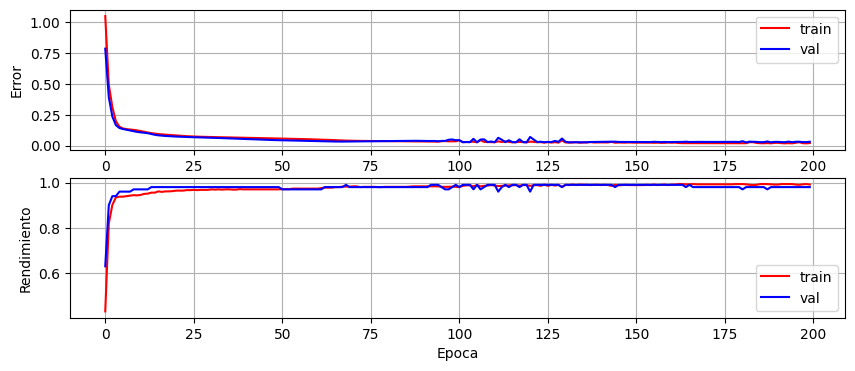

In [26]:
#Imprimir error
plt.figure(1, figsize=(10, 4))
plt.subplot(2,1,1)
plt.plot(hector.e, 'r')
plt.plot(hector.e_val, 'b')
plt.legend(["train", "val"])
plt.ylabel('Error')
plt.grid()
plt.subplot(2,1,2)
plt.plot(hector.r, 'r')
plt.plot(hector.r_val, 'b')
plt.legend(["train", "val"])
plt.ylabel('Rendimiento')
plt.xlabel('Epoca')
plt.grid()

### 5.- Evaluacion

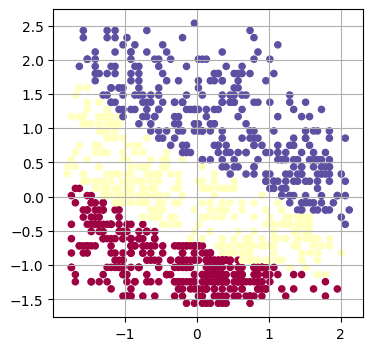

In [27]:
#Inicializar salida del modelo
ym = np.zeros(y.shape)

#Iterar sobre datos de entrada
for i in range(x.shape[0]):

  #Tomar entrada
  x_in = np.reshape(x[i, :], (2, 1))

  #Procesar con red neuronal
  prob = hector.forward(x_in)

  #Tomar salida mas alta (probabilidad) como prediccion del modelo
  ym[i] = np.argmax(prob)

#Graficar informacion
plt.figure(figsize=(4,4))
plt.scatter(x[:, 0], x[:, 1], c=ym, s=20, cmap=plt.cm.Spectral)
plt.grid()
plt.show()

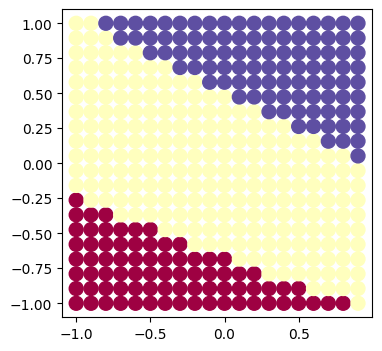

In [28]:
#Crear gradilla de datos
x_val = np.zeros([2, 400])
y_val = np.zeros(x_val.shape[1], dtype=int)
y_scores = np.zeros([x_val.shape[1], 3])
for i in range(20):

    x_val[0, i*20:(i+1)*20] = 2.0*i/20.0 - 1.0
    x_val[1, i*20:(i+1)*20] = 2.0*np.linspace(0, 100, 20)/100.0 - 1.0

#Evaluar gradilla con modelo
for i in range(x_val.shape[1]):

  #Tomar entrada i del vector
  x_in = x_val[:, i].reshape(2, 1)

  #Correr inferencia
  y_prob = hector.forward(x_in) #Puntajes de salida (2, 1)
  y_scores[i] = y_prob[:, 0]

  #Tomar salida mas alta como prediccion del modelo
  y_val[i] = np.argmax(y_prob)

#Graficar resultados
plt.figure(figsize=(4, 4))
plt.scatter(x_val[0, :], x_val[1, :], c=y_val, s=100, cmap=plt.cm.Spectral)
plt.show()

In [29]:
import plotly.graph_objects as pty

#Graficar puntos de entrada
points = pty.Scatter3d(
    x = x[:, 0],
    y = x[:, 1],
    z = 0.5*np.ones(y.shape),
    mode='markers',
    marker=dict(
        size=2,
        color='rgba(0, 0, 0, 0.5)', opacity=0.5
    )
)

#Graficar hiperplanos
colors = ['blue', 'yellow', 'red']
planes = []
for i in range(y_scores.shape[1]):

  #Crear hiperplano i
  plane = pty.Mesh3d(
      x = x_val[0, :],
      y = x_val[1, :],
      z = y_scores[:, i],
      color = colors[i],
      opacity = 0.5
  )

  #Agregar hiperplano a vector
  planes.append(plane)

#Crear grafica de plotly
fig = pty.Figure(data=[points] + planes)
fig.show()
